### Ohne Ausreißer entfernung

R² Trainingsdaten: 0.836855277249692
Mean squared error Trainingsdaten: 199.10866024364438
Mean absolute error Trainingsdaten: 11.458334802945878
R² Testdaten: 0.0012522080144702352
Mean squared error Testdaten: 16922.302068985406
Mean absolute error Testdaten: 19.0932943983217
N=10780, p=121, ||w||_2 = 2338506920791531.5


[]

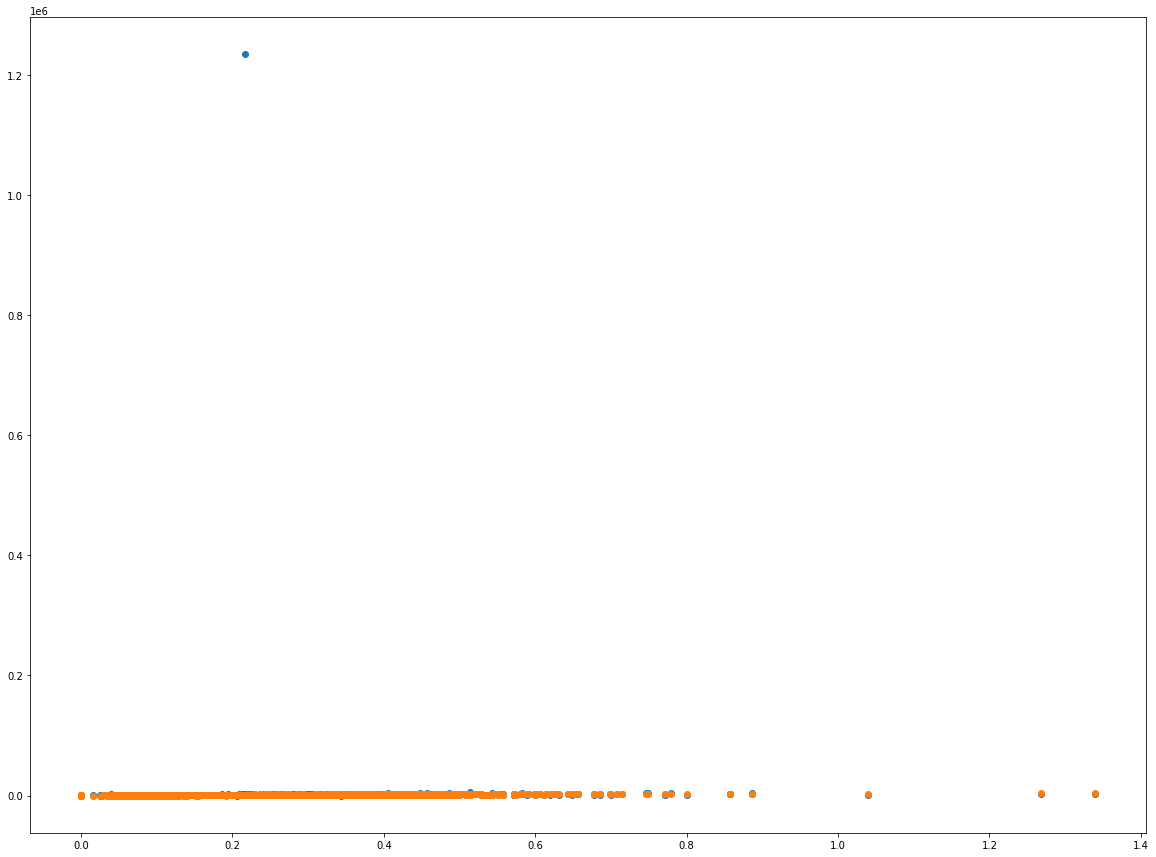

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = 50

df = pd.read_csv("../Data/immo_data.csv")
desc = pd.read_csv("../Data/immo_data_column_description.csv")

df_reduced = df[df.regio1 == "Baden_Württemberg"]
df_reduced = df_reduced.drop(["scoutId", "houseNumber", "geo_bln", "geo_krs", "geo_plz", "date", "telekomHybridUploadSpeed", "totalRent", "serviceCharge"], axis=1, errors="ignore")
categorical_columns = df_reduced.select_dtypes(exclude=np.number).columns

for c in categorical_columns:
    if len(df_reduced[c].unique()) > 50:
        df_reduced.drop(c, axis=1, inplace=True)

df_reduced = df_reduced[df_reduced["baseRent"].isna() == False]

red_num = df_reduced.select_dtypes("number").columns
red_qua = df_reduced.select_dtypes("object").columns

imp_mean = SimpleImputer(missing_values=np.nan, strategy= 'mean').fit(df_reduced[red_num])
imp_most = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent').fit(df_reduced[red_qua])

df_reduced[red_num] = imp_mean.transform(df_reduced[red_num])
df_reduced[red_qua] = imp_most.transform(df_reduced[red_qua])

df_reduced = pd.concat([pd.get_dummies(df_reduced[red_qua]),df_reduced], axis=1)
df_reduced = df_reduced.drop(red_qua, axis=1, errors="ignore")

from sklearn.model_selection import train_test_split
X = df_reduced.drop("baseRent", axis=1)
y = df_reduced["baseRent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 40, shuffle=True)
feature_names = (names for names in X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import linear_model
m_lr = linear_model.LinearRegression().fit(X_train,y_train)
y_train_pred = m_lr.predict(X_train)
y_test_pred = m_lr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_train = r2_score(y_train, y_train_pred)
mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = np.sqrt(mean_absolute_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = np.sqrt(mean_absolute_error(y_test, y_test_pred))

print(f"R² Trainingsdaten: {r2_train}")
print(f"Mean squared error Trainingsdaten: {mse_train}")
print(f"Mean absolute error Trainingsdaten: {mae_train}")
print(f"R² Testdaten: {r2_test}")
print(f"Mean squared error Testdaten: {mse_test}")
print(f"Mean absolute error Testdaten: {mae_test}")

# Problemdimensionen
print(f"N={X_train.shape[0]}, p={X_train.shape[1]}, ||w||_2 = {np.linalg.norm(m_lr.coef_)}")

plt.figure(figsize=(20, 15))
plt.scatter(X_test.T[X.columns.get_loc("livingSpace")], y_test)
plt.scatter(X_test.T[X.columns.get_loc("livingSpace")], y_test_pred)
plt.plot()

### 1.2 Modell nur für eine bestimme geografische Region

R² Trainingsdaten: 0.8606797795246564
Mean squared error Trainingsdaten: 169.53020238505044
Mean absolute error Trainingsdaten: 11.122590949676285
R² Testdaten: 0.8582405484850959
Mean squared error Testdaten: 165.5343595754007
Mean absolute error Testdaten: 11.131190438173487
N=10668, p=121, ||w||_2 = 3773308578723945.5


[]

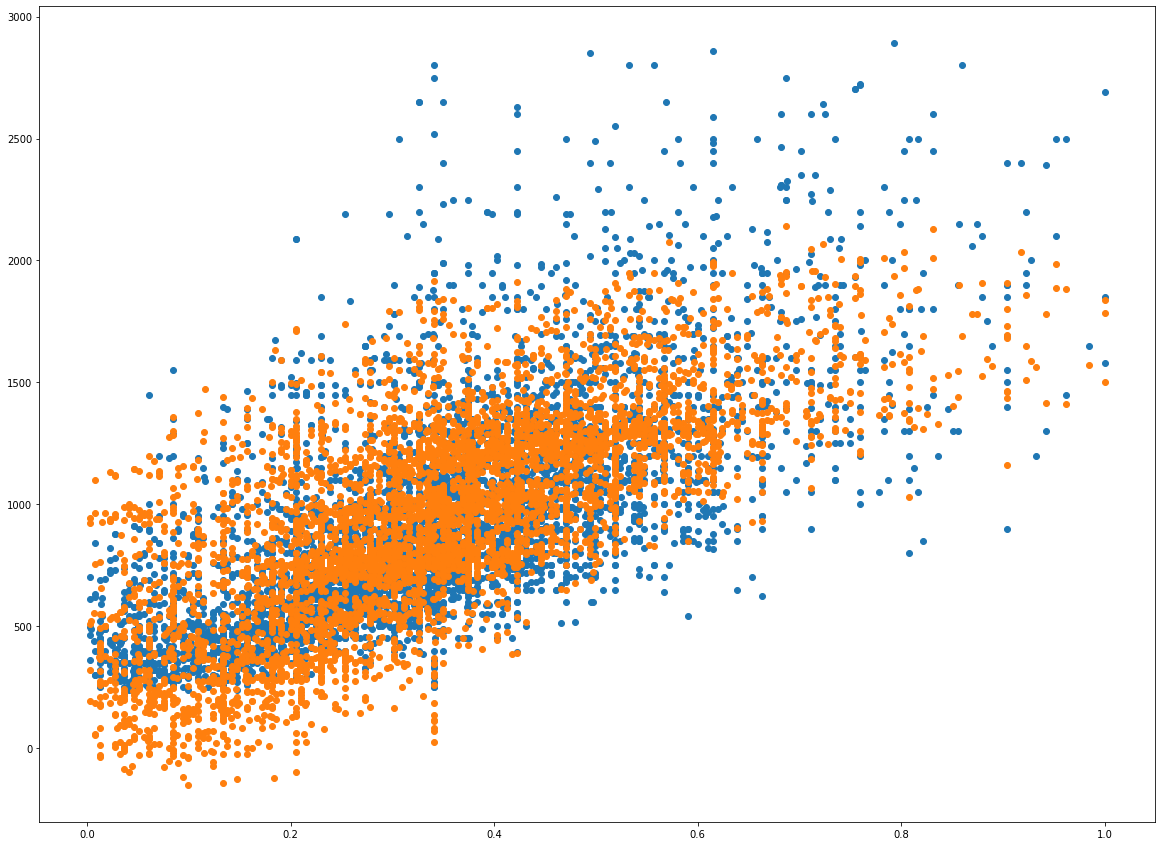

In [13]:
df = pd.read_csv("../Data/immo_data.csv")
desc = pd.read_csv("../Data/immo_data_column_description.csv")

df_reduced = df[df.regio1 == "Baden_Württemberg"]
df_reduced = df_reduced.drop(["scoutId", "houseNumber", "geo_bln", "geo_krs", "geo_plz", "date", "telekomHybridUploadSpeed", "totalRent", "serviceCharge"], axis=1, errors="ignore")
categorical_columns = df_reduced.select_dtypes(exclude=np.number).columns

for c in categorical_columns:
    if len(df_reduced[c].unique()) > 50:
        df_reduced.drop(c, axis=1, inplace=True)

interesting_columns = ["yearConstructed", "noParkSpaces", "baseRent", "livingSpace", "noRooms", "numberOfFloors", "heatingCosts", "lastRefurbish"]
upper_limits = df_reduced[interesting_columns].quantile(0.995)
lower_limits = df_reduced[interesting_columns].quantile(0.005)

for col in interesting_columns:
    df_reduced[col] = df_reduced[((df_reduced[col] < upper_limits[col]) & (df_reduced[col] > lower_limits[col])) | df_reduced[col].isna()][col]


df_reduced = df_reduced[df_reduced["baseRent"].isna() == False]

red_num = df_reduced.select_dtypes("number").columns
red_qua = df_reduced.select_dtypes("object").columns

imp_mean = SimpleImputer(missing_values=np.nan, strategy= 'mean').fit(df_reduced[red_num])
imp_most = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent').fit(df_reduced[red_qua])

df_reduced[red_num] = imp_mean.transform(df_reduced[red_num])
df_reduced[red_qua] = imp_most.transform(df_reduced[red_qua])

df_reduced = pd.concat([pd.get_dummies(df_reduced[red_qua]),df_reduced], axis=1)
df_reduced = df_reduced.drop(red_qua, axis=1, errors="ignore")

from sklearn.model_selection import train_test_split
X = df_reduced.drop("baseRent", axis=1)
y = df_reduced["baseRent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 40, shuffle=True)
feature_names = (names for names in X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn import linear_model
m_lr = linear_model.LinearRegression().fit(X_train,y_train)
y_train_pred = m_lr.predict(X_train)
y_test_pred = m_lr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_train = r2_score(y_train, y_train_pred)
mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = np.sqrt(mean_absolute_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = np.sqrt(mean_absolute_error(y_test, y_test_pred))

print(f"R² Trainingsdaten: {r2_train}")
print(f"Mean squared error Trainingsdaten: {mse_train}")
print(f"Mean absolute error Trainingsdaten: {mae_train}")
print(f"R² Testdaten: {r2_test}")
print(f"Mean squared error Testdaten: {mse_test}")
print(f"Mean absolute error Testdaten: {mae_test}")

# Problemdimensionen
print(f"N={X_train.shape[0]}, p={X_train.shape[1]}, ||w||_2 = {np.linalg.norm(m_lr.coef_)}")

# Ausgabe der ersten 10 Koeffizienten, absteigend nach Absolutbetrag skaliert
coefficients_lr = pd.DataFrame({"Feature Name": feature_names, "Coefficient": m_lr.coef_})

plt.figure(figsize=(20, 15))
plt.scatter(X_test.T[X.columns.get_loc("livingSpace")], y_test)
plt.scatter(X_test.T[X.columns.get_loc("livingSpace")], y_test_pred)
plt.plot()

### 1.3 Eigene Wohnung
Vorhersage der Kaltmiete für die eigene Wohnung

In [14]:
df_me = df_reduced[:1]

df_me = df_me.drop(["baseRent"], axis=1, errors="ignore")
df_me.heatingType_heat_pump = 1
df_me.heatingType_oil_heating = 0
df_me.interiorQual_simple = 1
df_me.interiorQual_sophisticated = 0
df_me.regio2_Karlsruhe = 1
df_me.regio2_Emmendingen_Kreis = 0
df_me.energyEfficiencyClass_B = 1
df_me.energyEfficiencyClass_E = 0
df_me.livingSpace = 26
df_me.noRooms = 1
df_me.floor = 5
df_me.heatingCost = 40

X_me = scaler.transform(df_me)

print(m_lr.predict(X_me))


[459.125]
